<div style="text-align: center;">
    <h2>What is the best Model to Predict if a person has Cancer?</h2>
    <img src="download.jpeg" alt="Image Description">
    <br><br>
    <strong>Boston University</strong><br>
    <strong>Summer 2024</strong><br>
    <strong>David Chavez</strong><br>
    <strong>Finn Graham</strong>
</div>


## Background 📚
In the healthcare sector, particularly in oncology, there is significant concern over the effectiveness of cancer detection methods. [Cancer Research UK](https://www.cancerresearchuk.org/health-professional/cancer-statistics/statistics-by-cancer-type) highlights that early and accurate cancer detection significantly improves treatment outcomes, yet many current models fail to reliably predict the presence of cancer, leading to delayed or incorrect treatments.

This gap underscores the **urgent need for improved predictive models** that can more accurately determine the likelihood of a person having cancer, thus enhancing early intervention strategies and potentially saving lives. The development of these models is crucial for aligning medical interventions with actual patient needs and minimizing the physical and financial burdens of unnecessary treatments.
cation models.


## Objectives 🎯

- **Predict** the likelihood of new patients **developing** a certain disease, based on their health features.
- **Identify** the primary **risk determinants** that significantly elevate the probability of diseases.


## Methodology 📊
| Step | Process                 | Description |
|------|-------------------------|-------------|
| 1    | **Data Preparation**    | Clean the dataset and apply two balancing methods to ensure fairness. Data sourced from the [BRFSS 2019 survey](https://www.cdc.gov/brfss/annual_data/annual_2019.html). |
| 2    | **Feature Engineering** | Utilize three attribute selection techniques to refine features. |
| 3    | **Model Development**   | Construct six different classification algorithms. |
| 4    | **Model Evaluation**    | Evaluate and compare the performance of 36 model variations to determine the most effective approach. |


> ⚠️ **Important Note:** The data used in this project is the [BRFSS 2019 survey](https://www.cdc.gov/brfss/annual_data/annual_2019.html), which collects data on health-related risk behaviors among the US population.

## Data Insights 🔍
<div style="background-color: #f8f9fa; padding: 10px; border-left: 5px solid #007bff;">
<strong>Dataset dimensions:</strong> Rows: 4999 Columns: 66
</div>

<style>
table {
    width: 100%;
    border-collapse: collapse;
}
th {
    background-color: #4CAF50;
    color: white;
}
th, td {
    padding: 8px;
    text-align: left;
    border-bottom: 1px solid #ddd;
}
tr:hover {background-color: #f5f5f5;}
</style>

| Variable  | Description                                            | Variable  | Description                                           | Variable  | Description                                           |
|-----------|--------------------------------------------------------|-----------|-------------------------------------------------------|-----------|-------------------------------------------------------|
| **FMONTH**    | Month when the interview was completed               | **PERSDOC2**  | Primary doctor status                                | **DIABETE4**  | Diabetes status                                      |
| **IDATE**     | Interview date                                        | **MEDCOST**   | Medical costs not seen due to expense                | **HAVARTH4**  | Arthritis status                                     |
| **IMONTH**    | Interview month                                       | **CHECKUP1**  | Time since last routine checkup                      | **MARITAL**   | Marital status                                       |
| **IDAY**      | Interview day                                         | **BPHIGH4**   | High blood pressure                                  | **EDUCA**     | Education level                                      |
| **IYEAR**     | Interview year                                        | **CHOLCHK2**  | Cholesterol checked                                  | **RENTHOM1**  | Home ownership                                       |
| **DISPCODE**  | Disposition code                                      | **TOLDHI2**   | Told have high cholesterol                           | **CPDEMO1B**  | Telephone usage                                      |
| **SEQNO**     | Unique sequence number                                | **CVDINFR4**  | Ever told had heart attack                           | **VETERAN3**  | Veteran status                                       |
| **SEXVAR**    | Respondent sex                                        | **CVDCRHD4**  | Ever told had angina or coronary heart disease       | **EMPLOY1**   | Employment status                                    |
| **GENHLTH**   | General health status                                 | **CVDSTRK3**  | Ever told had stroke                                 | **CHILDREN**  | Number of children                                   |
| **PHYSHLTH**  | Physical health status days                           | **ASTHMA3**   | Asthma status                                        | **INCOME2**   | Income levels                                        |
| **MENTHLTH**  | Mental health status days                             | **CHCCOPD2**  | Chronic obstructive pulmonary disease status         | **WEIGHT2**   | Weight in pounds                                     |
| **HLTHPLN1**  | Health care coverage                                  | **ADDEPEV3**  | Ever diagnosed with depression                       | **HEIGHT3**   | Height in inches                                     |
| **DEAF**      | Hearing difficulty                                    | **DIFFDRES**  | Dressing difficulty                                  | **FRENCHF1**  | French fries or chips consumption                    |
| **BLIND**     | Vision difficulty                                     | **DIFFALON**  | Living alone difficulty                              | **POTATOE1**  | Potatoes consumption                                 |
| **DECIDE**    | Decision making difficulty                            | **SMOKE100**  | Smoking status                                       | **VEGETAB2**  | Vegetables consumption                               |
| **DIFFWALK**  | Walking difficulty                                    | **USENOW3**   | Tobacco use                                          | **FLUSHOT7**  | Flu shot status                                      |
| **CHCKDNY2**  | Chronic kidney disease                                | **ALCDAY5**   | Alcohol consumption days                             | **TETANUS1**  | Tetanus shot status                                  |
| **EXERANY2**  | Exercise status                                       | **STRENGTH**  | Strength training frequency                          | **PNEUVAC4**  | Pneumonia vaccine status                             |
| **FRUIT2**    | Fruit consumption frequency                           | **FRUITJU2**  | Fruit juice consumption                              | **HIVTST7**   | HIV test status                                      |
| **FVGREEN1**  | Vegetable consumption frequency                       | **HIVRISK5**  | HIV risk assessment                                  | **QSTVER**    | Questionnaire version                                |
| **HTIN4**     | Height in inches (rounded)                            | **HTM4**      | Height in meters                                     | **WTKG3**     | Weight in kilograms                                  |
| **DRNKANY5**  | Any drinking status                                   | **Class**     | Patient Cancer Status                                |               |                                                       |


Loading necessary libraries and reading file 📖

In [70]:
packages <- c("readr", "caret", "rsample", "RWeka", "rpart", "rpart.plot", "MASS", 
              "kernlab", "pROC", "dplyr", "C50", "e1071", "ROSE", "FSelector", 
              "Boruta", "magrittr", "openxlsx", "tidyverse", "data.table","klaR","naivebayes")
for (pkg in packages) {
  library(pkg, character.only = TRUE)
}

In [145]:
df <- read_csv("project_data(1).csv")

Rows: 4999 Columns: 66
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Class
dbl (65): FMONTH, IDATE, IMONTH, IDAY, IYEAR, DISPCODE, SEQNO, SEXVAR, GENHL...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Data Dimension Reduction 📉

#### Columns that will not be useful for analysis based on domain knowledge 🚮.

Columns: FMONTH, IDATE, IMONTH, IDAY, IYEAR, DISPCODE, SEQNO 
>**Reason for Exclusion**: These columns are related to administration of the interview and do not cancer disease analysis.

Columns: MARITAL, EDUCA, RENTHOM1, CPDEMO1B, EMPLOY1, INCOME2, QSTVER, QSTLANG
>**Reason for Exclusion**: Not directly impact the analysis of cancer disease.

Columns: HTIN4, WEIGHT2, HEIGHT3
> **Reason for Exclusion**: These variables were derived from the columns HTM4 and WTKG3.

In [147]:
df <- df %>%
  select(-FMONTH, -IDATE, -IMONTH, -IDAY, -IYEAR, -SEQNO, -CPDEMO1B, -MARITAL,
         -DISPCODE, -EDUCA, -RENTHOM1, -EMPLOY1, -INCOME2, -QSTVER, -QSTLANG,
         -HTIN4, -WEIGHT2, -HEIGHT3)

#### Columns with almost 0 variance 🚮.

Columns: CHCKDNY, DIFFDRES, USENOW3, HIVRISK5

In [149]:
df <- df %>%
  select(-all_of(nearZeroVar(df, names = TRUE)))

#### Columns highly correlated 🚮.

Column: ALCDAY5

In [151]:
numeric_cols <- df %>% select(where(is.numeric))
highly.correlated.variables <- findCorrelation(cor(numeric_cols, use = "complete.obs"), cutoff = 0.7, names = TRUE)
df <- df %>% select(-all_of(highly.correlated.variables))

#### Multiple Correspondence Analysis (MCA) 🚮.

## Normalization of variables 📕

For normalization, recodification is needed based on domain knowledge. "Don’t know/Not sure","Refused," and other nonsensical values hardcoded as NA.

SEXVAR, GENHLTH, PHYSHLTH, MENTHLTH, HLTHPLN1, PERSDOC2, MEDCOST, CHECKUP1, CHOLCHK2, TOLDHI2, CVDINFR4, CVDCRHD4, ASTHMA3, CHCCOPD2, ADDEPEV3, HAVARTH4, VETERAN3, CHILDREN, DEAF, BLIND, DECIDE, DIFFWALK, DIFFALON, SMOKE100, EXERANY2, FLUSHOT7, PNEUVAC4, HIVTST7 and DRNKANY5 are handle with the same approach. 

> ⚠️ Just showing the first 5 variable as example.

In [153]:
scale <- function(x) {
  (x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE))
}

In [155]:
#SEXVAR
df$SEXVAR <- scale(df$SEXVAR)

#GENHLTH
df$GENHLTH[!(df$GENHLTH  %in% c(1, 2, 3, 4, 5))] <- NA
df$GENHLTH <- scale(df$GENHLTH)

#PHYSHLTH
df$PHYSHLTH[!(df$PHYSHLTH  %in% c(1:30))] <- NA
df$PHYSHLTH <- scale(df$PHYSHLTH)

#MENTHLTH
df$MENTHLTH[!(df$MENTHLTH  %in% c(1:30))] <- NA
df$MENTHLTH<- scale(df$MENTHLTH)

#HLTHPLN1
df$HLTHPLN1[!(df$HLTHPLN1  %in% c(1,2))] <- NA
df$HLTHPLN1<- scale(df$HLTHPLN1)

#PERSDOC2
df$PERSDOC2[!(df$PERSDOC2 %in% c(1,2,3))] <- NA
df$PERSDOC2<- scale(df$PERSDOC2)

#MEDCOST
df$MEDCOST[!(df$MEDCOST %in% c(1,2))] <- NA
df$MEDCOST<- scale(df$MEDCOST)

#CHECKUP1
df$CHECKUP1[!(df$CHECKUP1 %in% c(1,2,3,4))] <- NA
df$CHECKUP1<- scale(df$CHECKUP1)

#CHOLCHK2 
df$CHOLCHK2[!(df$CHOLCHK2 %in% c(1,2,3,4,5,6))] <- NA
df$CHOLCHK2<- scale(df$CHOLCHK2)

#TOLDHI2 
df$TOLDHI2[!(df$TOLDHI2 %in% c(1,2))] <- NA
df$TOLDHI2<- scale(df$TOLDHI2)

#CVDINFR4 
df$CVDINFR4[!(df$CVDINFR4 %in% c(1,2))] <- NA
df$CVDINFR4<- scale(df$CVDINFR4)

#CVDCRHD4
df$CVDCRHD4[!(df$CVDCRHD4 %in% c(1,2))] <- NA
df$CVDCRHD4<- scale(df$CVDCRHD4)

#ASTHMA3 
df$ASTHMA3[!(df$ASTHMA3 %in% c(1,2))] <- NA
df$ASTHMA3 <- scale(df$ASTHMA3)

#CHCCOPD2
df$CHCCOPD2[!(df$CHCCOPD2 %in% c(1,2))] <- NA
df$CHCCOPD2<- scale(df$CHCCOPD2)

#ADDEPEV3 
df$ADDEPEV3[!(df$ADDEPEV3 %in% c(1,2))] <- NA
df$ADDEPEV3 <- scale(df$ADDEPEV3)

#HAVARTH4 
df$HAVARTH4[!(df$HAVARTH4 %in% c(1,2))] <- NA
df$HAVARTH4<- scale(df$DIABETE4)

#VETERAN3
df$VETERAN3[!(df$VETERAN3 %in% c(1,2))] <- NA
df$VETERAN3<- scale(df$VETERAN3)

#CHILDREN
df$CHILDREN[!(df$CHILDREN %in% c(1:87))] <- NA
df$CHILDREN <- scale(df$CHILDREN)

#DEAF
df$DEAF[!(df$DEAF %in% c(1,2))] <- NA
df$DEAF<- scale(df$DEAF)

#BLIND
df$BLIND[!(df$BLIND %in% c(1,2))] <- NA
df$BLIND<- scale(df$BLIND)

#DECIDE
df$DECIDE[!(df$DECIDE %in% c(1,2))] <- NA
df$DECIDE <- scale(df$DECIDE)

#DIFFWALK 
df$DIFFWALK[!(df$DIFFWALK %in% c(1,2))] <- NA
df$DIFFWALK <- scale(df$DIFFWALK)

#DIFFALON
df$DIFFALON[!(df$DIFFALON %in% c(1,2))] <- NA
df$DIFFALON<- scale(df$DIFFALON)

#SMOKE100
df$SMOKE100[!(df$SMOKE100 %in% c(1,2))] <- NA
df$SMOKE100<- scale(df$SMOKE100)

#EXERANY2
df$EXERANY2[!(df$EXERANY2 %in% c(1,2))] <- NA
df$EXERANY2<- scale(df$EXERANY2)

#FLUSHOT7
df$FLUSHOT7[!(df$FLUSHOT7 %in% c(1,2))] <- NA
df$FLUSHOT7 <- scale(df$FLUSHOT7)

#PNEUVAC4
df$PNEUVAC4[!(df$PNEUVAC4 %in% c(1,2))] <- NA
df$PNEUVAC4 <- scale(df$PNEUVAC4)

#HIVTST7
df$HIVTST7[!(df$HIVTST7 %in% c(1,2))] <- NA
df$HIVTST7 <- scale(df$HIVTST7)

#DRNKANY5
df$DRNKANY5[!(df$DRNKANY5 %in% c(1,2))] <- NA
df$DRNKANY5 <- scale(df$DRNKANY5)

#TETANUS1
df$TETANUS1[(df$TETANUS1 %in% c(7,9))] <- NA
df$TETANUS1 <- scale(df$TETANUS1)

BPHIGH4 and BPHIGH4 are handle with the same approach. 

In [157]:
#BPHIGH4
df$BPHIGH4 <- ifelse(!(df$BPHIGH4 %in% c(1, 2, 3, 4)), NA, df$BPHIGH4)
df$BPHIGH4 <- recode(df$BPHIGH4, `1` = 8, `2` = 7, `3` = 5, `4` = 6)
df$BPHIGH4 <- scale(df$BPHIGH4)

#DIABETE4
df$DIABETE4 <- ifelse(!(df$DIABETE4 %in% c(1, 2, 3, 4)), NA, df$DIABETE4)
df$DIABETE4 <- recode(df$DIABETE4, `1` = 8, `2` = 7, `3` = 5, `4` = 6)
df$DIABETE4 <- scale(df$DIABETE4)


STRENGTH, FRUIT2, FRUITJU2, FVGREEN1, FRENCHF1, POTATOE1 and VEGETAB2 are handle with the same approach. 

> ⚠️ Just showing the first 5 variable as example.

In [159]:
#STRENGTH
df$STRENGTH[df$STRENGTH %in% c(200, 777, 999)] <- NA
df$STRENGTH[df$STRENGTH == 888] <- 0
df$STRENGTH <- ifelse(df$STRENGTH %in% 101:199, df$STRENGTH %% 100, df$STRENGTH)
df$STRENGTH <- ifelse(df$STRENGTH %in% 201:299, df$STRENGTH %% 200, df$STRENGTH)
df$STRENGTH <- round(scale(df$STRENGTH),1)

#FRUIT2
df$FRUIT2[df$FRUIT2 %in% c(777, 999, 555, 300)] <- NA
df$FRUIT2[df$FRUIT2 %in% c(555, 300)] <- c(0, 0.5)[match(df$FRUIT2, c(555, 300))]
df$FRUIT2 <- ifelse(df$FRUIT2 %in% 101:199, df$FRUIT2 %% 100, df$FRUIT2)
df$FRUIT2 <- ifelse(df$FRUIT2 %in% 201:299, df$FRUIT2 %% 200, df$FRUIT2)
df$FRUIT2 <- ifelse(df$FRUIT2 %in% 301:399, df$FRUIT2 %% 300, df$FRUIT2)
df$FRUIT2 <- round(scale(df$FRUIT2),2)

#FRUITJU2
df$FRUITJU2[df$FRUITJU2 %in% c(777, 999)] <- NA
df$FRUITJU2[df$FRUITJU2 %in% c(555, 300)] <- 0
df$FRUITJU2 <- ifelse(df$FRUITJU2 %in% 101:199, df$FRUITJU2 %% 100, df$FRUITJU2)
df$FRUITJU2 <- ifelse(df$FRUITJU2 %in% 201:299, df$FRUITJU2 %% 200, df$FRUITJU2)
df$FRUITJU2 <- ifelse(df$FRUITJU2 %in% 301:399, df$FRUITJU2 %% 300, df$FRUITJU2)
df$FRUITJU2 <- round(scale(df$FRUITJU2),1)

#FVGREEN1
df$FVGREEN1[df$FVGREEN1 %in% c(777, 999)] <- NA
df$FVGREEN1[df$FVGREEN1 %in% c(555, 300)] <- 0
df$FVGREEN1 <- ifelse(df$FVGREEN1 %in% 101:199, df$FVGREEN1 %% 100 , df$FVGREEN1)
df$FVGREEN1 <- ifelse(df$FVGREEN1 %in% 201:299, df$FVGREEN1 %% 200 , df$FVGREEN1)
df$FVGREEN1 <- ifelse(df$FVGREEN1 %in% 301:399, df$FVGREEN1 %% 300, df$FVGREEN1)
df$FVGREEN1 <- round(scale(df$FVGREEN1),1)

#FRENCHF1
df$FRENCHF1[df$FRENCHF1 %in% c(777, 999, 200)] <- NA
df$FRENCHF1[df$FRENCHF1 %in% c(555, 300)] <- 0
df$FRENCHF1 <- ifelse(df$FRENCHF1 %in% 101:199, df$FRENCHF1 %% 100, df$FRENCHF1)
df$FRENCHF1 <- ifelse(df$FRENCHF1 %in% 201:299, df$FRENCHF1 %% 200, df$FRENCHF1)
df$FRENCHF1 <- ifelse(df$FRENCHF1 %in% 301:399, df$FRENCHF1 %% 300, df$FRENCHF1)
df$FRENCHF1 <- round(scale(df$FRENCHF1),1)

#POTATOE1
df$POTATOE1[df$POTATOE1 %in% c(777, 999)] <- NA
df$POTATOE1[df$POTATOE1 %in% c(555, 300)] <- 0
df$POTATOE1 <- ifelse(df$POTATOE1 %in% 101:199, df$POTATOE1 %% 100, df$POTATOE1)
df$POTATOE1 <- ifelse(df$POTATOE1 %in% 201:299, df$POTATOE1 %% 200, df$POTATOE1)
df$POTATOE1 <- ifelse(df$POTATOE1 %in% 301:399, df$POTATOE1 %% 300, df$POTATOE1)
df$POTATOE1 <- round(scale(df$POTATOE1),1)

#VEGETAB2
df$VEGETAB2[df$VEGETAB2 %in% c(777, 999)] <- NA
df$VEGETAB2[df$VEGETAB2 %in% c(555, 300)] <- 0
df$VEGETAB2 <- ifelse(df$VEGETAB2 %in% 101:199, df$VEGETAB2 %% 100, df$VEGETAB2)
df$VEGETAB2 <- ifelse(df$VEGETAB2 %in% 201:299, df$VEGETAB2 %% 200, df$VEGETAB2)
df$VEGETAB2 <- ifelse(df$VEGETAB2 %in% 301:399, df$VEGETAB2 %% 300, df$VEGETAB2)
df$VEGETAB2 <- round(scale(df$VEGETAB2),1)

For variables HTM4 and WTKG3 the same approach is done. 

The code builds a **decision tree** to predict Class using HTM4, extracts split points using **entrophy**. If no splits are found, uses the 33rd and 66th percentiles of  bins HTM4 into categories based on these splits

> ⚠️ Just showing the first variable as example.

In [161]:
#HTM4  
tree_model <- rpart(Class ~ HTM4, data = df, method = "class", control=rpart.control(minsplit=1, cp=0.001))
splits <- sort(unique(tree_model$frame$split[!is.na(tree_model$frame$split)]))
if (length(splits) == 0) {
  cat("No valid splits found. Using quantile-based fallback splits.\n")
  splits <- quantile(df$HTM4, probs = c(0.33, 0.66), na.rm = TRUE)
}
labels <- as.character(1:(length(splits) + 1))
df$HTM4 <- cut(df$HTM4, breaks = c(-Inf, splits, Inf), include.lowest = TRUE, labels = labels)
df$HTM4 <- as.numeric(df$HTM4)
df$HTM4 <- scale(df$HTM4) 

#WTKG3
tree_model <- rpart(Class ~ WTKG3, data = df, method = "class", control=rpart.control(minsplit=1, cp=0.001))
splits <- sort(unique(tree_model$frame$split[!is.na(tree_model$frame$split)]))
if (length(splits) == 0) {
  cat("No valid splits found. Using quantile-based fallback splits.\n")
  splits <- quantile(df$WTKG3, probs = c(0.33, 0.66), na.rm = TRUE)
}
labels <- as.character(1:(length(splits) + 1))
df$WTKG3 <- cut(df$WTKG3, breaks = c(-Inf, splits, Inf), include.lowest = TRUE, labels = labels)
df$WTKG3 <- as.numeric(df$WTKG3)
df$WTKG3 <- scale(df$WTKG3)

No valid splits found. Using quantile-based fallback splits.
No valid splits found. Using quantile-based fallback splits.


### Data Cleaning: Addressing Blanks, Duplicates, and Outliers 🧹

#### Removing duplicates 🔁

In [163]:
sum(duplicated(df))
df <- distinct(df)

[1] 6

#### Filling Missing Values 🤷‍♂️

**22685 NA** values observed

**Function**: fill_missing_with_regression

This function automates the process of imputing missing values in a dataframe using linear regression models, leveraging the strongest correlations among variables.

Steps:
| Step | Description |
|------|-------------|
| 1    | **Compute Correlation Matrix**: Calculate the correlation matrix only from complete observations. |
| 2    | **Convert Correlation to Dataframe**: Transform the correlation matrix to a dataframe for ease of manipulation. |
| 3    | **Identify Columns with NAs**: Detect all columns that contain missing values. |
| 4    | **Find Highest Correlated Columns**: For each column with missing values, identify the column that has the highest correlation with it. |
| 5    | **Build Regression Models**: Construct a regression model for each pair of highly correlated columns. |
| 6    | **Predict Missing Values**: Use the regression models to estimate and fill in the missing valsI
##### Implementation Details

- The correlation matrix is computed using only those rows that do not contain any missing values to ensure accuracy in correlation calculation.
- Each column's strongest correlation is determined by absolute value, meaning both strong positive and negative correlations are considered.
- Regression models are built individually for each column with missing data based on its most correlated counterpart, providing tailored imputation.
- Predictions from these models directly replace the missing values, thus maintaining the integrity and distribution of the original data.


In [165]:
 # 1
fill_missing_with_regression <- function(df) { numeric_cols <- df %>% select(where(is.numeric))
  correlation_matrix <- cor(numeric_cols, use = "complete.obs") # 1
  
  # 2
  correlation_df <- as.data.frame(correlation_matrix) %>%
    rownames_to_column(var = "Row") %>%
    pivot_longer(cols = -Row, names_to = "Column", values_to = "Correlation") %>%
    filter(Row != Column, !is.na(Correlation)) %>%
    arrange(desc(abs(Correlation)))
  
  # 3
  cols_with_na <- names(df)[colSums(is.na(df)) > 0]
  print(paste("Columns with NA:", toString(cols_with_na)))
  
  for (col in cols_with_na) {
    top_correlation <- correlation_df %>%
      filter(Row == col | Column == col) %>%
      slice_max(abs(Correlation), n = 1) 
  # 4
    if (nrow(top_correlation) > 0) {
      predictor_col <- ifelse(top_correlation$Row[1] == col, top_correlation$Column[1], top_correlation$Row[1])
      print(paste("Processing:", col, "using", predictor_col))
      missing_indices <- which(is.na(df[[col]]) & !is.na(df[[predictor_col]]))
      if (length(missing_indices) == 0) {
        print(paste("No valid data to impute for column:", col))
        next} 
  # 5 
      formula <- as.formula(paste(col, "~", predictor_col))
      model <- lm(formula, data = df, na.action = na.exclude) # 5
      
  # 6
      predictions <- predict(model, newdata = df[missing_indices, , drop = FALSE], type = "response")
      df[[col]][missing_indices] <- predictions
    } else {
      print(paste("No correlations found for column:", col))}} 
                                            return(df)}
   

Aplication of the formula to **fill out NA values with regression**

In [167]:
df <- fill_missing_with_regression(df)

[1] "Columns with NA: GENHLTH, PHYSHLTH, MENTHLTH, HLTHPLN1, PERSDOC2, MEDCOST, CHECKUP1, BPHIGH4, CHOLCHK2, TOLDHI2, CVDINFR4, CVDCRHD4, ASTHMA3, CHCCOPD2, ADDEPEV3, DIABETE4, VETERAN3, CHILDREN, DEAF, BLIND, DECIDE, DIFFWALK, DIFFALON, SMOKE100, EXERANY2, STRENGTH, FRUIT2, FRUITJU2, FVGREEN1, FRENCHF1, POTATOE1, VEGETAB2, FLUSHOT7, TETANUS1, PNEUVAC4, HIVTST7, HTM4, WTKG3, DRNKANY5"
[1] "Processing: GENHLTH using DIFFWALK"
[1] "Processing: PHYSHLTH using GENHLTH"
[1] "Processing: MENTHLTH using DIFFWALK"
[1] "Processing: HLTHPLN1 using FRENCHF1"
[1] "Processing: PERSDOC2 using CHECKUP1"
[1] "Processing: MEDCOST using FRUIT2"
[1] "Processing: CHECKUP1 using CHOLCHK2"
[1] "Processing: BPHIGH4 using TOLDHI2"
[1] "Processing: CHOLCHK2 using CHECKUP1"
[1] "Processing: TOLDHI2 using BPHIGH4"
[1] "Processing: CVDINFR4 using CVDCRHD4"
[1] "Processing: CVDCRHD4 using HAVARTH4"
[1] "Processing: ASTHMA3 using CVDCRHD4"
[1] "Processing: CHCCOPD2 using CVDCRHD4"
[1] "Processing: ADDEPEV3 using SE

Exclude rows with more than **3** values of NA

In [169]:
df <- df[rowSums(is.na(df)) <= 3, ]

Finally, **replace NAs** with **mode** in each column

In [171]:
get_mode <- function(x) {uniq_x <- unique(x)
  uniq_x[which.max(tabulate(match(x, uniq_x)))]}
for (col in names(df)) {mode_value <- get_mode(df[[col]][!is.na(df[[col]])]) 
  df[[col]][is.na(df[[col]])] <- mode_value }

#### Checking for outliers 🚩
**No outliers** detected.

In [173]:
numeric_cols <- df %>% select(where(is.numeric))
outliers <- numeric_cols > 3

In [ ]:
numeric_cols <- df %>% 
  select(where(is.numeric)) %>% 
  mutate(across(everything(), adjust_values))
df <- df %>% 
  select(Class) %>%
  bind_cols(numeric_cols)
print(head(df))

### Data visualization 💹

**Distribution of Sex by Cancer Status**

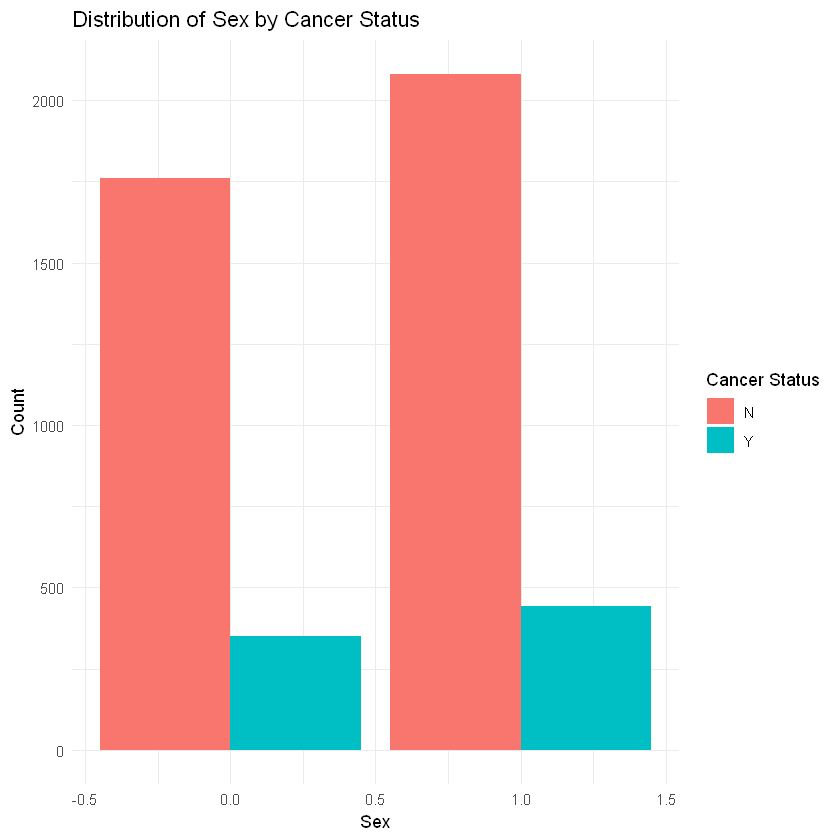

In [267]:
plot <- ggplot(df, aes(x = SEXVAR, fill = Class)) +
  geom_bar(position = "dodge") +
  labs(title = "Distribution of Sex by Cancer Status",
       x = "Sex",
       y = "Count",
       fill = "Cancer Status") +
  theme_minimal()

print(plot)


**Distribution of Conditions by Cancer Status**

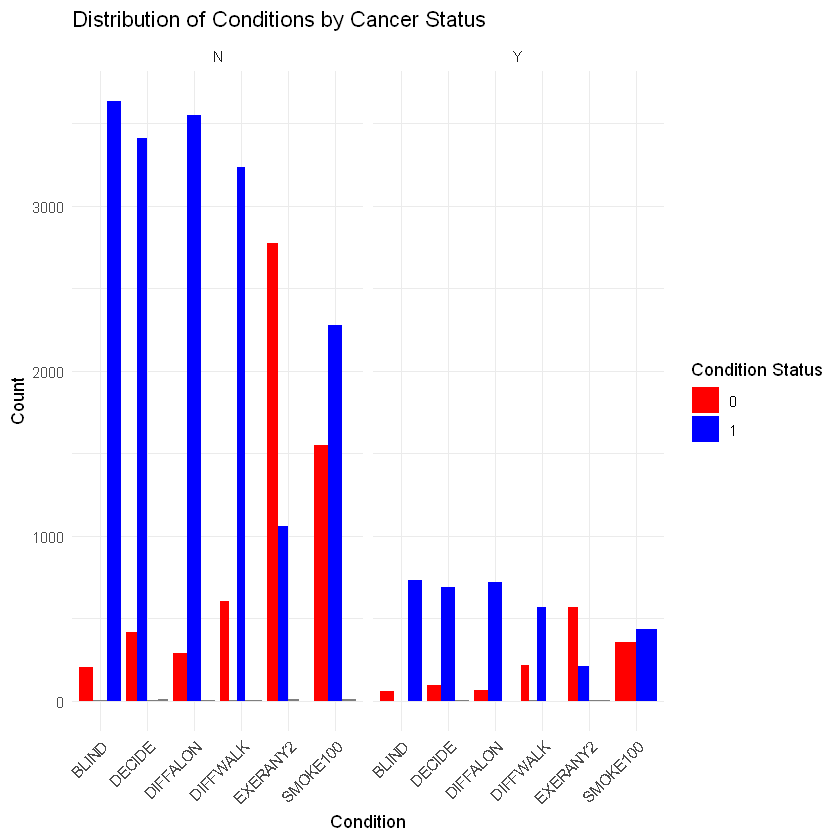

In [272]:
df <- df %>%
  mutate(across(c(BLIND, DECIDE, DIFFWALK, DIFFALON, SMOKE100, EXERANY2, SEXVAR, Class), as.factor))
df_long <- df %>%
  pivot_longer(cols = c(BLIND, DECIDE, DIFFWALK, DIFFALON, SMOKE100, EXERANY2), 
               names_to = "Condition", values_to = "Value")
plot <- ggplot(df_long, aes(x = Condition, fill = Value)) +
  geom_bar(position = "dodge") +
  facet_wrap(~ Class) +
  labs(title = "Distribution of Conditions by Cancer Status",
       x = "Condition",
       y = "Count",
       fill = "Condition Status") +
  scale_fill_manual(values = c("0" = "red", "1" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
print(plot)

**Distribution of health eating habits**

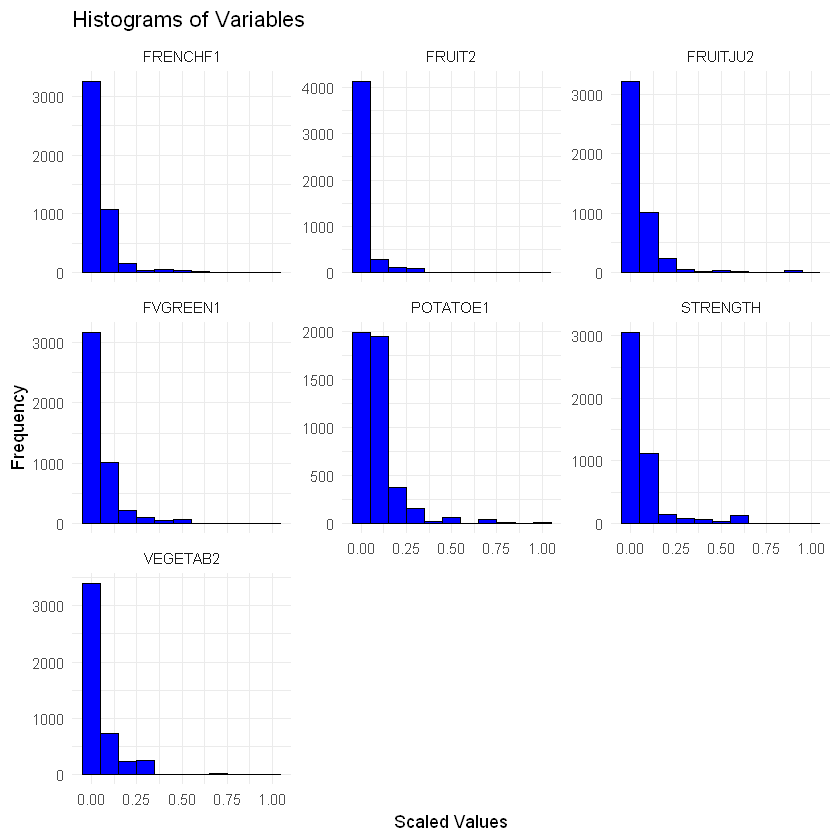

In [274]:
long_df <- df %>%
  select(STRENGTH, FRUIT2, FRUITJU2, FVGREEN1, FRENCHF1, POTATOE1, VEGETAB2) %>%
  pivot_longer(cols = everything(), names_to = "Variable", values_to = "Value")
ggplot(long_df, aes(x = Value)) +
  geom_histogram(binwidth = 0.1, fill = "blue", color = "black") +
  facet_wrap(~ Variable, scales = "free_y") +
  labs(title = "Histograms of Variables", x = "Scaled Values", y = "Frequency") +
  theme_minimal()

### Spliting the data 📁

**Sampling with Base R**

In [278]:
set.seed(123)
strata <- split(df, df$Class)

sample_indices <- function(df) {
    sample(1:nrow(df), size = 0.70 * nrow(df))}
train_indices <- unlist(lapply(strata, sample_indices))

train <- df[train_indices, ]
test <- df[-train_indices, ]

**Feature Selection**
Method 1: Information Gain

In [280]:
weights <- information.gain(Class~., train)
new_weights <- subset(weights, attr_importance > 0)

In [282]:
ig_train <- train[, c("GENHLTH", "PHYSHLTH", "MENTHLTH", "HLTHPLN1", "PERSDOC2", 
                      "CHECKUP1", "BPHIGH4", "CHOLCHK2", "TOLDHI2", "CVDINFR4", "CVDCRHD4", 
                      "CHCCOPD2", "VETERAN3", "CHILDREN", "DEAF", "DIFFWALK", "FLUSHOT7", "PNEUVAC4","Class")]

ig_test <- test[, c("GENHLTH", "PHYSHLTH", "MENTHLTH", "HLTHPLN1", "PERSDOC2", 
                    "CHECKUP1", "BPHIGH4", "CHOLCHK2", "TOLDHI2", "CVDINFR4", "CVDCRHD4", 
                    "CHCCOPD2", "VETERAN3", "CHILDREN", "DEAF", "DIFFWALK", "FLUSHOT7", "PNEUVAC4","Class")]


In [300]:
tuneGrid <- expand.grid(
    laplace = c(0.5, 1, 1.5, 2),  
    usekernel = c(TRUE, FALSE),  
    adjust = c(1, 2))   
    
ig_nb_model <- train(Class ~ .,
                     data = ig_train,
                     method = "naive_bayes",
                     trControl = ctrl,
                     tuneGrid = tuneGrid,
                     metric = "Accuracy",
                     maximize = TRUE)


Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."


In [298]:
test_pred_ig_nb <- predict(ig_nb_model, newdata = ig_test)
test_pred_ig_nb <- as.factor(test_pred_ig_nb)
ig_test$Class <- as.factor(ig_test$Class)
levels(test_pred_ig_nb) <- levels(ig_test$Class)
conf_matrix <- confusionMatrix(test_pred_ig_nb, ig_test$Class, mode = "everything")
print(conf_matrix)

Confusion Matrix and Statistics

          Reference
Prediction    N    Y
         N 1480  289
         Y    1    0
                                          
               Accuracy : 0.8362          
                 95% CI : (0.8181, 0.8531)
    No Information Rate : 0.8367          
    P-Value [Acc > NIR] : 0.5413          
                                          
                  Kappa : -0.0011         
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9993          
            Specificity : 0.0000          
         Pos Pred Value : 0.8366          
         Neg Pred Value : 0.0000          
              Precision : 0.8366          
                 Recall : 0.9993          
                     F1 : 0.9108          
             Prevalence : 0.8367          
         Detection Rate : 0.8362          
   Detection Prevalence : 0.9994          
      Balanced Accuracy 

**With caret Package**

In [76]:
train_indices <- createDataPartition(y = df$Class, p = 0.70, list = FALSE, times = 1)

train <- df[train_indices, ]
test <- df[-train_indices, ]